#Outlier Detection

## Univariate Outlier Detection

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from itertools import combinations



In [ ]:
df = pd.read_csv('prog_book.csv')
df[['Price', 'Number_Of_Pages', 'Rating', 'Reviews']] = df[['Price', 'Number_Of_Pages', 'Rating', 'Reviews']].apply(pd.to_numeric, errors='coerce')
df = df.dropna(subset=['Price', 'Number_Of_Pages', 'Rating', 'Reviews'])

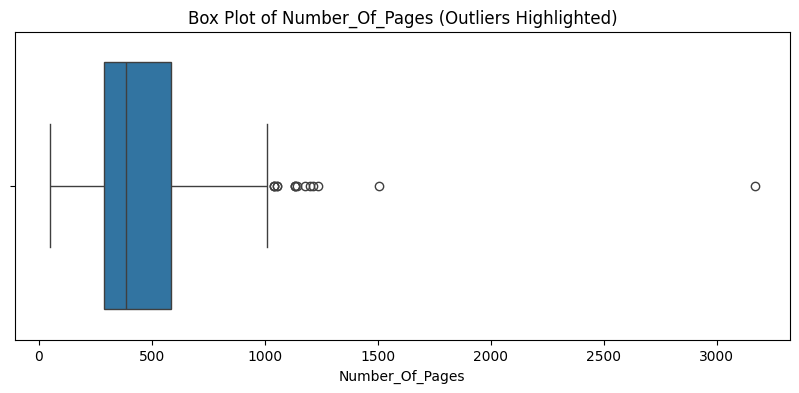

Outliers in Number_Of_Pages:
     Number_Of_Pages                                         Book_title
86              1200                                   Beginning Java 2
137             1506  The Linux Programming Interface: A Linux and U...
203             1214                                    Learning Python
206             1040                       The C++ Programming Language
232             1142                           Database System Concepts
240             1180                         Introduction to Algorithms
245             1052                           Game Engine Architecture
249             1056              Geometric Tools for Computer Graphics
253             1136              Modern Operating Systems, 4th Edition
258             1136  The C++ Standard Library: A Tutorial and Refer...
259             1132         Artificial Intelligence: A Modern Approach
260             1040  3D Game Engine Design: A Practical Approach to...
265             1235  Numerical Rec

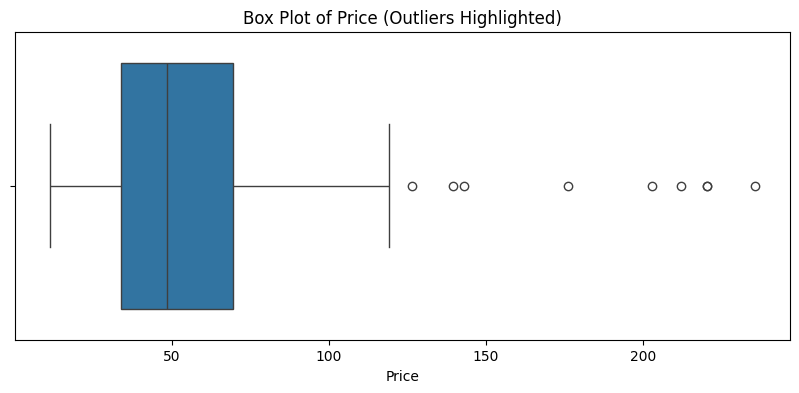

Outliers in Price:
          Price                                         Book_title
262  126.579412       Compilers: Principles, Techniques, and Tools
263  139.435294                            Game Programming Gems 4
264  143.138235                            Game Programming Gems 3
265  176.144118  Numerical Recipes: The Art of Scientific Compu...
266  203.108823  3D Game Engine Architecture: Engineering Real-...
267  212.097059                An Introduction to Database Systems
268  220.385294  The Art of Computer Programming, Volumes 1-3 B...
269  220.385294  The Art of Computer Programming, Volumes 1-4a ...
270  235.650000              A Discipline for Software Engineering 



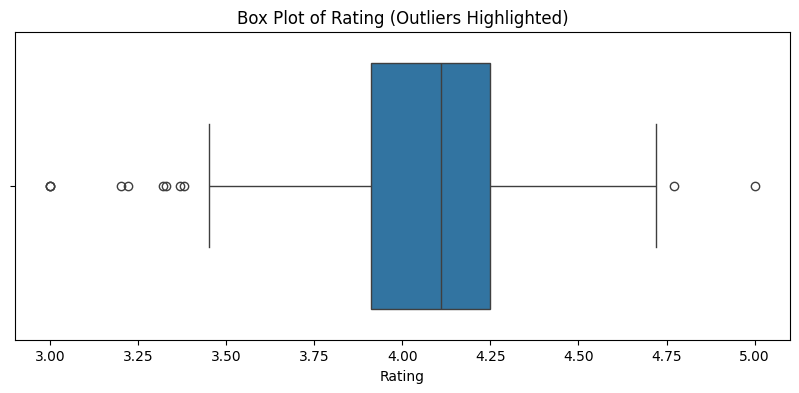

Outliers in Rating:
     Rating                                         Book_title
2      3.33       Responsive Web Design Overview For Beginners
24     3.20                      Game Programming Golden Rules
54     5.00                            Your First App: Node.js
60     3.32         Sams Teach Yourself JavaScript in 24 Hours
86     3.22                                   Beginning Java 2
94     3.38               Sams Teach Yourself Perl in 24 Hours
132    3.37                     Unity Virtual Reality Projects
177    3.00  Advanced Game Programming: A Gamedev.Net Colle...
182    3.00  Cross-Platform Game Programming (Game Developm...
187    3.00  Lambda-Calculus, Combinators and Functional Pr...
269    4.77  The Art of Computer Programming, Volumes 1-4a ... 



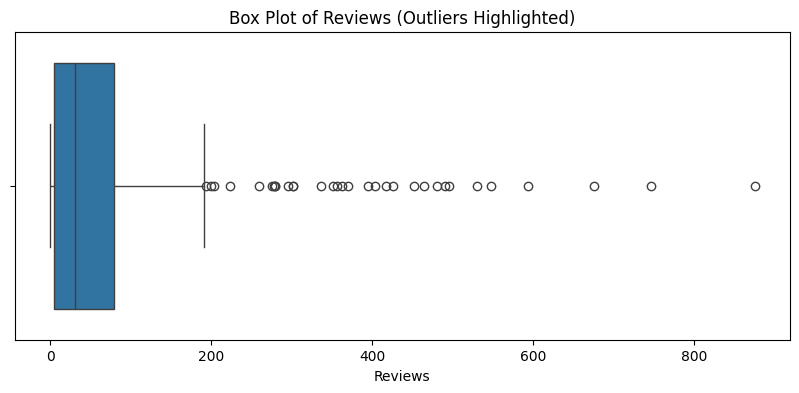

Outliers in Reviews:
     Reviews                                         Book_title
11     481.0  The Master Algorithm: How the Quest for the Ul...
14     593.0  The Art of the Start: The Time-Tested, Battle-...
15     417.0  Kingpin: How One Hacker Took Over the Billion-...
17     279.0  Linked: How Everything Is Connected to Everyth...
18     370.0  Our Final Invention: Artificial Intelligence a...
21     676.0  Big Data: A Revolution That Will Transform How...
26     491.0  How to Create a Mind: The Secret of Human Thou...
32     356.0  Data and Goliath: The Hidden Battles to Collec...
34     295.0  What Is Life? with Mind and Matter and Autobio...
38     530.0                         JavaScript: The Good Parts
40     336.0  Accelerate: Building and Scaling High-Performi...
53     302.0  The Strangest Man: The Hidden Life of Paul Dir...
67     547.0  Code: The Hidden Language of Computer Hardware...
69     203.0  Eloquent JavaScript: A Modern Introduction to ...
74     259.0       

In [ ]:
for var in vars:
    plt.figure(figsize=(10, 4))
    q1, q3 = df[var].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df[(df[var] < lower) | (df[var] > upper)][[var, 'Book_title']]
    sns.boxplot(x=df[var])
    plt.title(f'Box Plot of {var} (Outliers Highlighted)')
    plt.show()
    print(f"Outliers in {var}:")
    print(outliers, "\n")

## Multivariate Outlier Detection

### Bivariate Outliers Using DBSCAN (eps=1.8, min_samples=4)


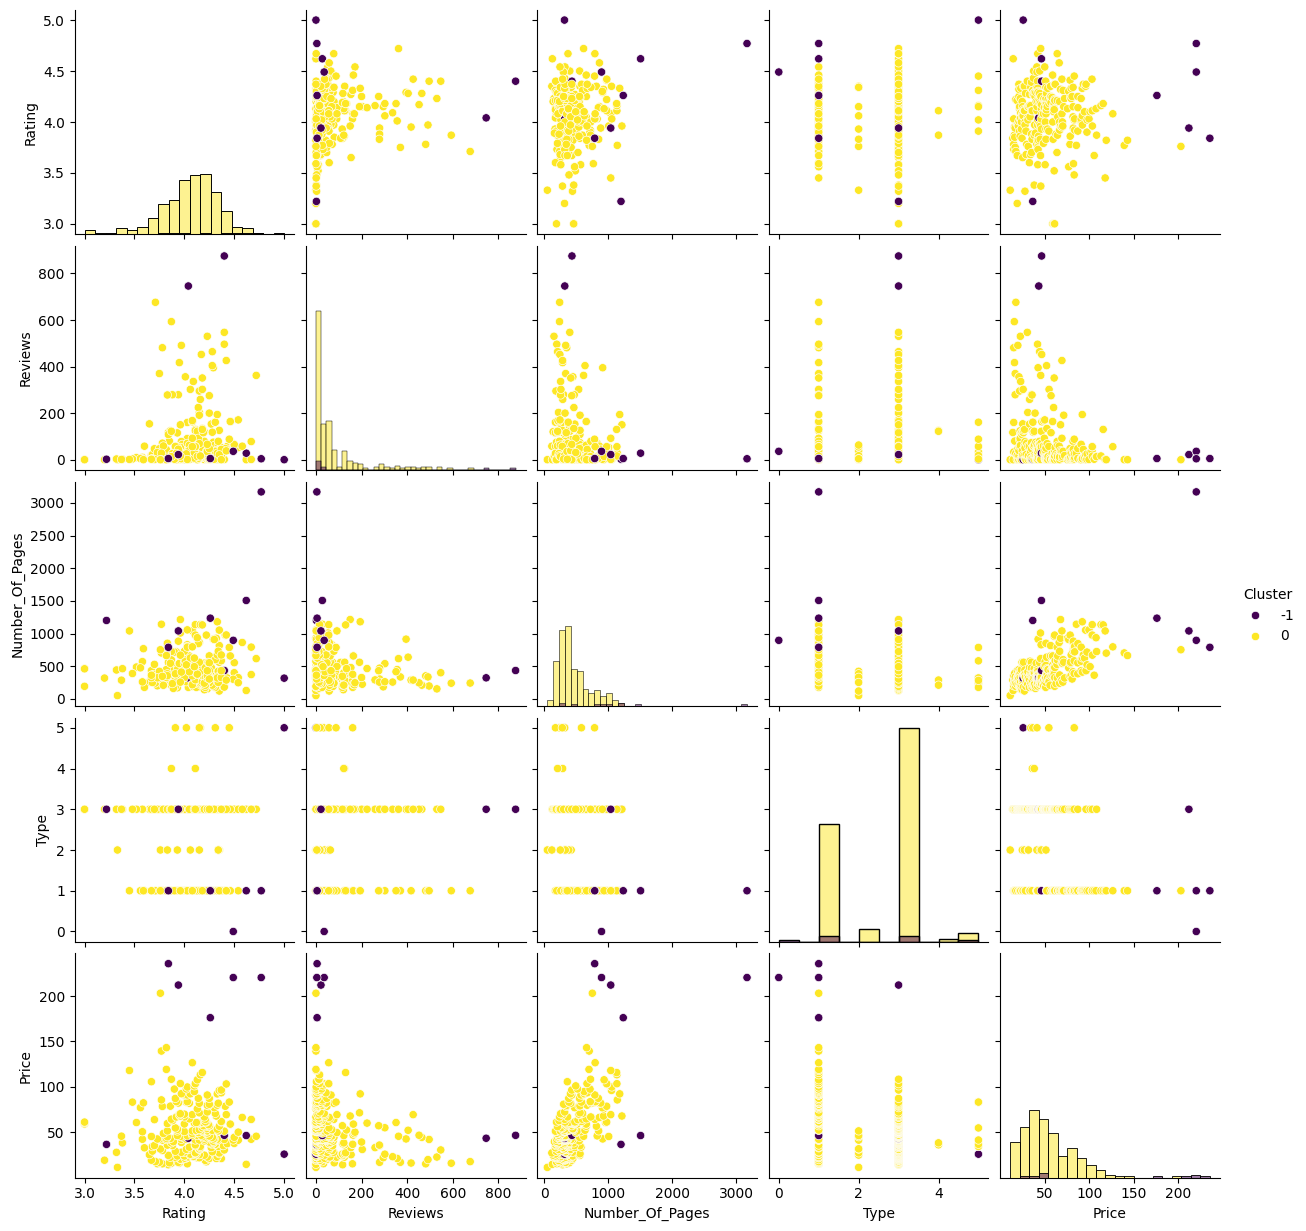

Outliers:
   index       Price  Number_Of_Pages  Rating  Reviews  Type
0     54   25.855882              317    5.00      0.0     5
1     86   36.617647             1200    3.22      2.0     3
2    122   43.370588              322    4.04    746.0     3
3    137   46.358824             1506    4.62     28.0     1
4    138   46.573529              434    4.40    875.0     3
5    265  176.144118             1235    4.26      5.0     1
6    267  212.097059             1040    3.94     22.0     3
7    268  220.385294              896    4.49     36.0     0
8    269  220.385294             3168    4.77      4.0     1
9    270  235.650000              789    3.84      5.0     1
Outliers for Price vs Number_Of_Pages:
   index       Price  Number_Of_Pages
0     54   25.855882              317
1     86   36.617647             1200
2    122   43.370588              322
3    137   46.358824             1506
4    138   46.573529              434
5    265  176.144118             1235
6    267  212.

In [ ]:
df['Type'] = df['Type'].astype(str)
df['Type'] = LabelEncoder().fit_transform(df['Type'])
df = df.dropna(subset=['Price', 'Number_Of_Pages', 'Rating', 'Reviews', 'Type'])
features = ['Price', 'Number_Of_Pages', 'Rating', 'Reviews', 'Type']
scaled = StandardScaler().fit_transform(df[features])
db = DBSCAN(eps=1.8, min_samples=4)
df['Cluster'] = db.fit_predict(scaled)
sns.pairplot(df, hue='Cluster', diag_kind='hist', palette='viridis')
plt.show()
outliers = df[df['Cluster'] == -1]
print("Outliers:")
print(outliers[['Price', 'Number_Of_Pages', 'Rating', 'Reviews', 'Type']].reset_index())
for combo in combinations(features, 2):
    print(f"Outliers for {combo[0]} vs {combo[1]}:")
    print(outliers[[combo[0], combo[1]]].reset_index())

### Three Variable Analysis (eps=1.7, min_samples=4)

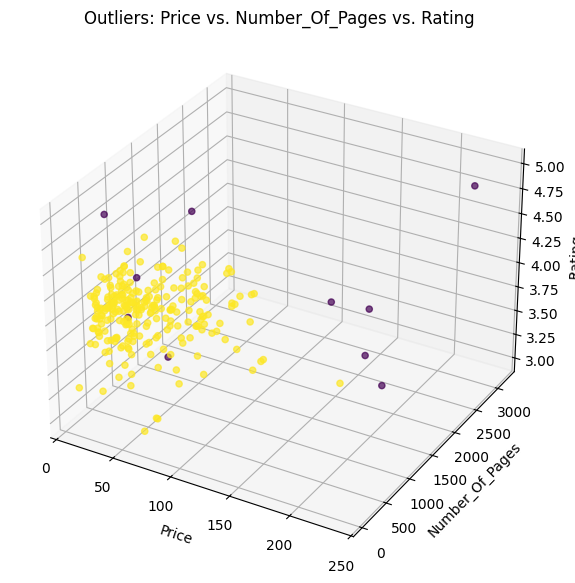

Outliers for Price vs. Number_Of_Pages vs. Rating:
   index       Price  Number_Of_Pages  Rating
0     54   25.855882              317    5.00
1     86   36.617647             1200    3.22
2    122   43.370588              322    4.04
3    137   46.358824             1506    4.62
4    138   46.573529              434    4.40
5    265  176.144118             1235    4.26
6    267  212.097059             1040    3.94
7    268  220.385294              896    4.49
8    269  220.385294             3168    4.77
9    270  235.650000              789    3.84


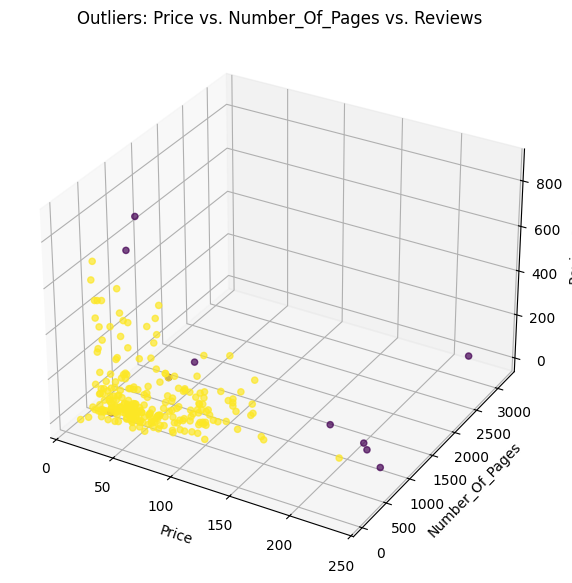

Outliers for Price vs. Number_Of_Pages vs. Reviews:
   index       Price  Number_Of_Pages  Reviews
0     54   25.855882              317      0.0
1     86   36.617647             1200      2.0
2    122   43.370588              322    746.0
3    137   46.358824             1506     28.0
4    138   46.573529              434    875.0
5    265  176.144118             1235      5.0
6    267  212.097059             1040     22.0
7    268  220.385294              896     36.0
8    269  220.385294             3168      4.0
9    270  235.650000              789      5.0


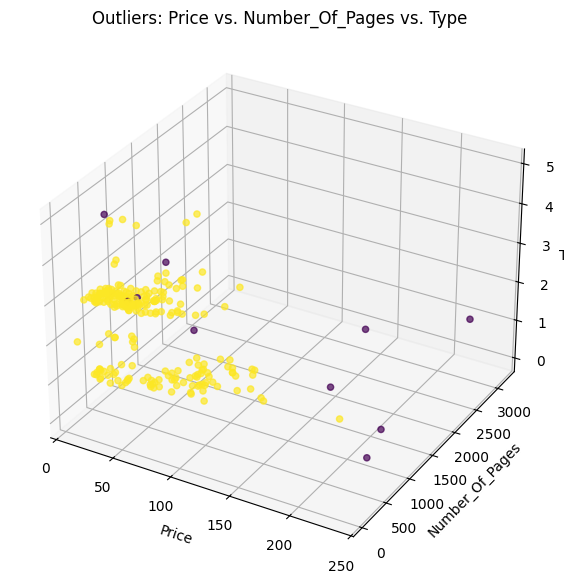

Outliers for Price vs. Number_Of_Pages vs. Type:
   index       Price  Number_Of_Pages  Type
0     54   25.855882              317     5
1     86   36.617647             1200     3
2    122   43.370588              322     3
3    137   46.358824             1506     1
4    138   46.573529              434     3
5    265  176.144118             1235     1
6    267  212.097059             1040     3
7    268  220.385294              896     0
8    269  220.385294             3168     1
9    270  235.650000              789     1


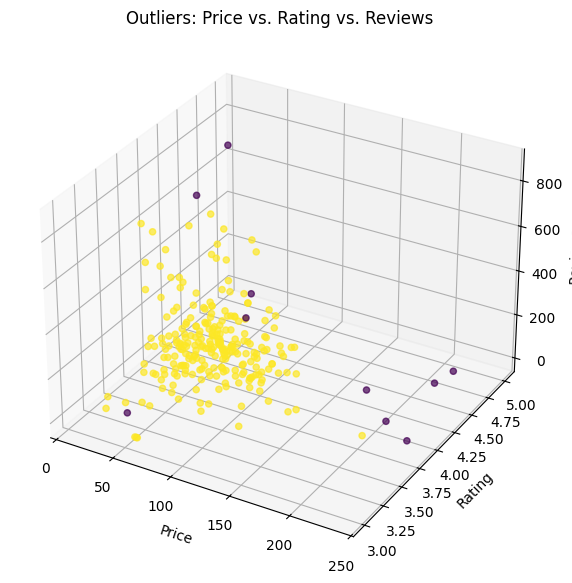

Outliers for Price vs. Rating vs. Reviews:
   index       Price  Rating  Reviews
0     54   25.855882    5.00      0.0
1     86   36.617647    3.22      2.0
2    122   43.370588    4.04    746.0
3    137   46.358824    4.62     28.0
4    138   46.573529    4.40    875.0
5    265  176.144118    4.26      5.0
6    267  212.097059    3.94     22.0
7    268  220.385294    4.49     36.0
8    269  220.385294    4.77      4.0
9    270  235.650000    3.84      5.0


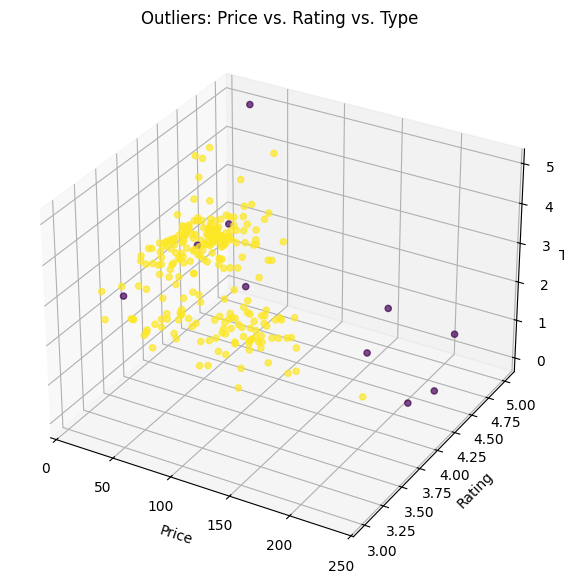

Outliers for Price vs. Rating vs. Type:
   index       Price  Rating  Type
0     54   25.855882    5.00     5
1     86   36.617647    3.22     3
2    122   43.370588    4.04     3
3    137   46.358824    4.62     1
4    138   46.573529    4.40     3
5    265  176.144118    4.26     1
6    267  212.097059    3.94     3
7    268  220.385294    4.49     0
8    269  220.385294    4.77     1
9    270  235.650000    3.84     1


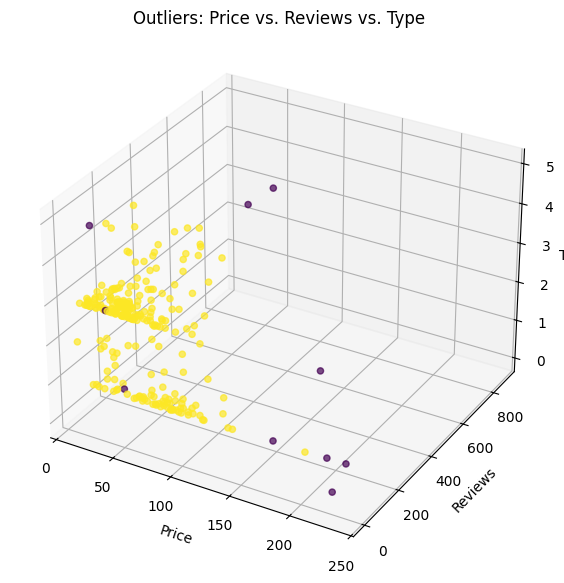

Outliers for Price vs. Reviews vs. Type:
   index       Price  Reviews  Type
0     54   25.855882      0.0     5
1     86   36.617647      2.0     3
2    122   43.370588    746.0     3
3    137   46.358824     28.0     1
4    138   46.573529    875.0     3
5    265  176.144118      5.0     1
6    267  212.097059     22.0     3
7    268  220.385294     36.0     0
8    269  220.385294      4.0     1
9    270  235.650000      5.0     1


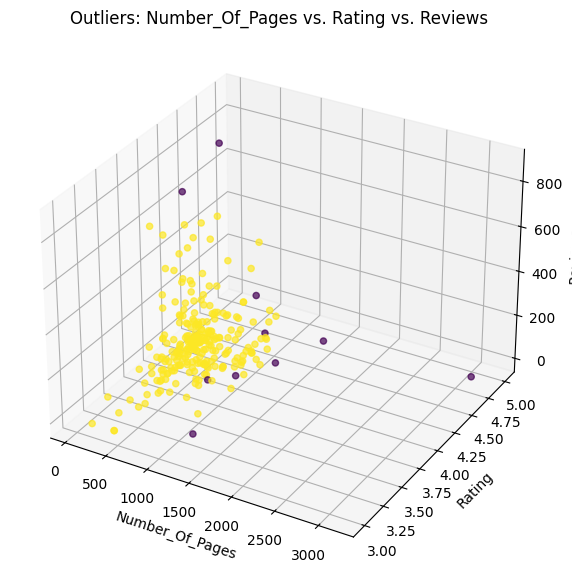

Outliers for Number_Of_Pages vs. Rating vs. Reviews:
   index  Number_Of_Pages  Rating  Reviews
0     54              317    5.00      0.0
1     86             1200    3.22      2.0
2    122              322    4.04    746.0
3    137             1506    4.62     28.0
4    138              434    4.40    875.0
5    265             1235    4.26      5.0
6    267             1040    3.94     22.0
7    268              896    4.49     36.0
8    269             3168    4.77      4.0
9    270              789    3.84      5.0


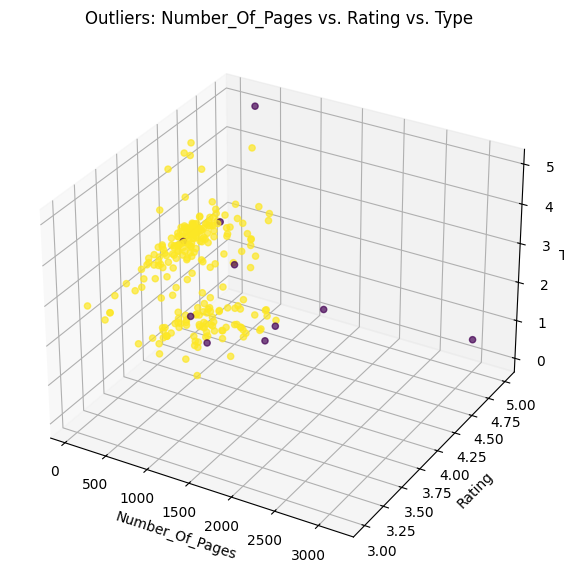

Outliers for Number_Of_Pages vs. Rating vs. Type:
   index  Number_Of_Pages  Rating  Type
0     54              317    5.00     5
1     86             1200    3.22     3
2    122              322    4.04     3
3    137             1506    4.62     1
4    138              434    4.40     3
5    265             1235    4.26     1
6    267             1040    3.94     3
7    268              896    4.49     0
8    269             3168    4.77     1
9    270              789    3.84     1


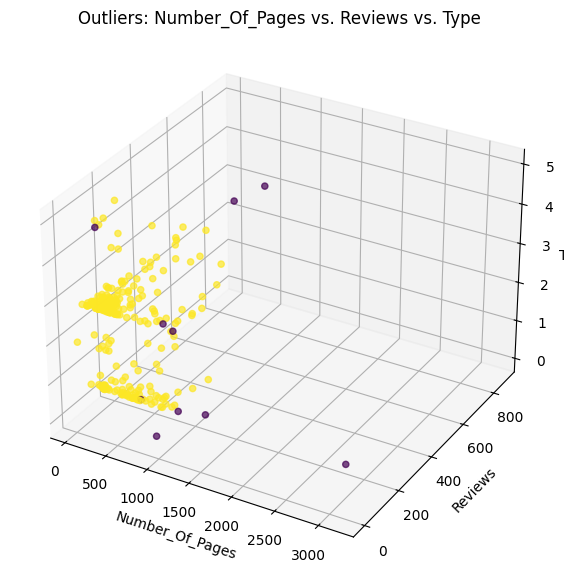

Outliers for Number_Of_Pages vs. Reviews vs. Type:
   index  Number_Of_Pages  Reviews  Type
0     54              317      0.0     5
1     86             1200      2.0     3
2    122              322    746.0     3
3    137             1506     28.0     1
4    138              434    875.0     3
5    265             1235      5.0     1
6    267             1040     22.0     3
7    268              896     36.0     0
8    269             3168      4.0     1
9    270              789      5.0     1


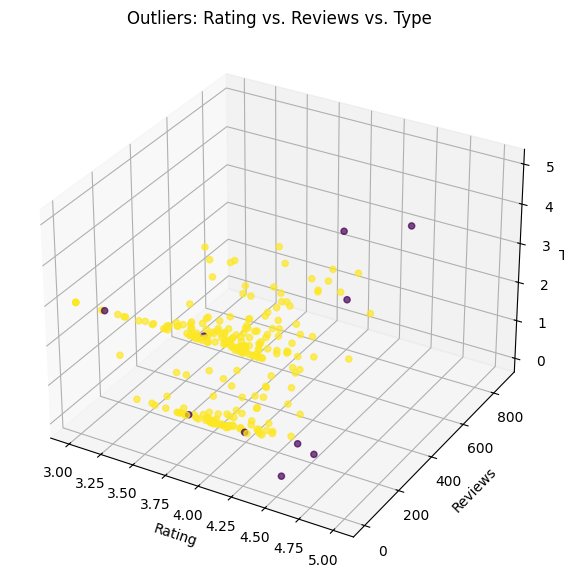

Outliers for Rating vs. Reviews vs. Type:
   index  Rating  Reviews  Type
0     54    5.00      0.0     5
1     86    3.22      2.0     3
2    122    4.04    746.0     3
3    137    4.62     28.0     1
4    138    4.40    875.0     3
5    265    4.26      5.0     1
6    267    3.94     22.0     3
7    268    4.49     36.0     0
8    269    4.77      4.0     1
9    270    3.84      5.0     1


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
for combo in combinations(features, 3):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[combo[0]], df[combo[1]], df[combo[2]], c=df['Cluster'], cmap='viridis', alpha=0.7, marker='o')
    ax.set_xlabel(combo[0])
    ax.set_ylabel(combo[1])
    ax.set_zlabel(combo[2])
    plt.title(f"Outliers: {combo[0]} vs. {combo[1]} vs. {combo[2]}")
    plt.show()
    print(f"Outliers for {combo[0]} vs. {combo[1]} vs. {combo[2]}:")
    print(outliers[[combo[0], combo[1], combo[2]]].reset_index())
